# Setting things up
add a shortcut to this following folder into your own google drive, so you don't need your local harddrive stroage:

https://drive.google.com/drive/folders/1hMByHFDsgCx-iCED3Z1WccOh690c84ew?usp=sharing

The first few lines of this code will mount your drive and read the data via the shortcut. You may need to authorize Colab to read your Drive, just follow the code's output instructions.

# PAMAP2 Dataset structure

* 1 -> timestamp (s)
* 2 -> activityID (see II.2. for the mapping to the activities)
* 3 -> heart rate (bpm)
* 4 - 20 -> IMU hand
* 21 - 37 -> IMU chest
* 38 - 54 -> IMU ankle

## IMU Data structure
The IMU sensory data was recorded with a frequency of 100Hz and contains the following columns:
* 1 -> temperature (°C)
* 2 - 4 -> 3D-acceleration data (ms -2 ),  scale: ±16g, resolution: 13-bit
* 5 - 7 -> 3D-acceleration data (ms -2 ),  scale: ±6g, resolution: 13-bit *
* 8 - 10 -> 3D-gyroscope data (rad/s)
* 11 - 13 -> 3D-magnetometer data (μT)
* 14 - 17 -> orientation (invalid in this data collection)

## Activity definitions
The corresponding IDs for the activities are:
* 0 -> other (transient activities)
* 1 -> lying
* 2 -> sitting
* 3 -> standing
* 4 -> walking
* 5 -> running
* 6 -> cycling
* 7 -> Nordic walking
* 9 -> watching TV
* 10 -> computer work
* 11 -> car driving
* 12 -> ascending stairs
* 13 -> descending stairs
* 16 -> vacuum cleaning
* 17 -> ironing
* 18 -> folding laundry
* 19 -> house cleaning
* 20 -> playing soccer
* 24 -> rope jumping

The dataset is orignially published by a colleague from DFKI and is now listed here:
https://archive.ics.uci.edu/ml/datasets/PAMAP2+Physical+Activity+Monitoring
But you don't need to download it from the UCI link because the google drive folder linked at the beginning is the same.

**Your task is simple, first run this code, the program will stop somewhere, there will be comments guiding you where you need to modify to continue the script as well as the expected output.**

# Program description
This program can be used to separate the data provided in the PAMAP2 dataset into different time windows.

The default value for Window size is 2 seconds with a step size of 0.5 seconds. 

The default file for data extraction is Protocol/subject101.dat 

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import glob, os
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
# Define style for plotting
plt.style.use('seaborn-darkgrid')

In [ ]:
# Import files from drive
# follow the link if it asks you for authorization
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Copy protocol files from drive to the content folder
# this may take a while
!cp -r "/content/drive/My Drive/PAMAP2_Dataset/Protocol" .

In [ ]:
# These are the "Tableau 20" colors as RGB for plotting.   
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Default file names
fileName = "Protocol/subject101.dat"
outputFile = fileName.replace(".dat","")

# Default columns to extract from Dataset, the dataset contains more sensors, but we only consider these
cols = [0,4,5,6] # Timestamp + 3D Acceleration Hand 

# Define default window size and time step in seconds
windowSize = 2    # (seconds)
windowStep = 0.5  # (seconds)

In [ ]:
# Replace Nan values in data
def replaceNan (data):
    # Use median as strategy to replace nan values 
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    # Fit data excluding the first column (timestamp)
    imputer.fit(data[:, 1:])    
    data[:, 1:] = imputer.transform(data[:, 1:])

## Load and observe the data

Plot the data with the annotations overlapping

In [ ]:
# Import the dataset
dataset = pd.read_csv(fileName, header=None, sep=' ') 

X = dataset.iloc[:, cols].values
y = dataset.iloc[:, 1].values # Activity labels

print("X shape: ",X.shape)
print("y shape: ",y.shape)

# Check if there are Nan values in the dataset
nanCount = np.isnan(X).sum()
print(nanCount," Nan values")

# Taking care of missing data (Nan)
print("Replacing Nan values ...")
replaceNan(X)

# Check again if there are Nan values in the dataset
nanCount = np.isnan(X).sum()
print(nanCount," Nan values")

X shape:  (376417, 4)
y shape:  (376417,)
4362  Nan values
Replacing Nan values ...
0  Nan values


In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.0,0.0,0.0,0.0,31.8125,0.238080,9.80003,-1.68896,0.265304,9.81549,-1.41344,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.0,0.0,0.0,0.0,30.3125,9.65918,-1.65569,-0.099797,9.64689,-1.55576,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047758,0.006474,14.8991,-69.2224,-5.82311,1.0,0.0,0.0,0.0,31.8125,0.319530,9.61282,-1.49328,0.234939,9.78539,-1.42846,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.0,0.0,0.0,0.0,30.3125,9.69370,-1.57902,-0.215687,9.61670,-1.61630,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.0,0.0,0.0,0.0,31.8125,0.235593,9.72421,-1.76621,0.173850,9.72528,-1.51894,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.0,0.0,0.0,0.0,30.3125,9.58944,-1.73276,0.092914,9.63173,-1.58605,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.0,0.0,0.0,0.0,31.8125,0.388697,9.53572,-1.72410,0.157969,9.64994,-1.57952,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.0,0.0,0.0,0.0,30.3125,9.58814,-1.77040,0.054545,9.63197,-1.63135,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.0,0.0,0.0,0.0,31.8125,0.315800,9.49908,-1.60914,0.233506,9.57411,-1.44418,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.0,0.0,0.0,0.0,30.3125,9.69771,-1.65625,-0.060809,9.64699,-1.64647,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0


In [ ]:
X

array([[8.38000e+00, 2.37223e+00, 8.60074e+00, 3.51048e+00],
       [8.39000e+00, 2.18837e+00, 8.56560e+00, 3.66179e+00],
       [8.40000e+00, 2.37357e+00, 8.60107e+00, 3.54898e+00],
       ...,
       [3.77252e+03, 2.07163e+00, 8.39581e+00, 5.77742e+00],
       [3.77253e+03, 2.19569e+00, 8.77634e+00, 6.00892e+00],
       [3.77254e+03, 2.14774e+00, 8.66047e+00, 5.73918e+00]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# you can ignore this code block, cudos to Juan who wrote this nice plotting function
def plot_fulldata(data, labels, regioncolors):
    # Define the upper limit, lower limit, interval of Y axis and colors
    y_LL = int( np.amin(data[:,1:])*1.1)
    y_UL = int( np.amax(data[:,1:])*1.1)
    y_interval = 10
    mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']  


    fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80) 
    columns = data.shape[1]-1

    # Draw Plot for each column in data
    for column in range(columns):
        plt.plot(data[:,0], data[:,column+1], lw=1.5, color=mycolors[column])    


    # Draw Tick lines  
    for ylin in range(y_LL, y_UL, y_interval):    
        plt.hlines(ylin, xmin=0, xmax=data[-1,0], colors='white', alpha=1, linestyles="--", lw=1.5)

    # Decorations    
    plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                    labelbottom=True, left=False, right=False, labelleft=True) 

    # Lighten borders
    plt.gca().spines["top"].set_alpha(.3)
    plt.gca().spines["bottom"].set_alpha(.3)
    plt.gca().spines["right"].set_alpha(.3)
    plt.gca().spines["left"].set_alpha(.3)

    plt.title('Physical Activity Monitoring for %s'%(fileName.replace(".dat","").replace("Protocol/","")), fontsize=22)
    plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
    plt.xlabel('Time (s)')
    plt.ylabel('3D-acceleration data($ms^{-2}$)')  
    plt.ylim(y_LL, y_UL)    
    plt.xlim(0, data[-1,0]) 

    # Detect a change of activities
    label_ch = np.where(np.diff(labels) != 0)[0]
    # Add extreme values (0 and data size)
    label_ch = np.insert(label_ch,0,0)
    label_ch = np.append(label_ch,data[:,0].shape[0]-1)  

    # New list to store plotted labels
    ex_label = []

    #Color the regions according to the activity
    for reg in range (len(label_ch)-1):
        # Find the corresponding color to the activity
        colour = regioncolors[labels[label_ch[reg+1]]]
        # Detect if the label is repeated
        activity_id = labels[label_ch[reg+1]]
        if activity_id in ex_label:
            lab = "_"
        else:
            ex_label.append(activity_id)
            lab = activity_id
        # Fill the corresponding region with color
        ax.axvspan(data[label_ch[reg],0], data[label_ch[reg+1],0], alpha=0.5, color=colour,label=lab)

    # Get the labels and handles to sort them according to the activity ID
    xhandles, xlabels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    xlabels, xhandles = zip(*sorted(zip(xlabels, xhandles), key=lambda x: int(''.join(filter(str.isdigit, x[0])))))
    ax.legend(xhandles, xlabels,title="Activity IDs", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.show()

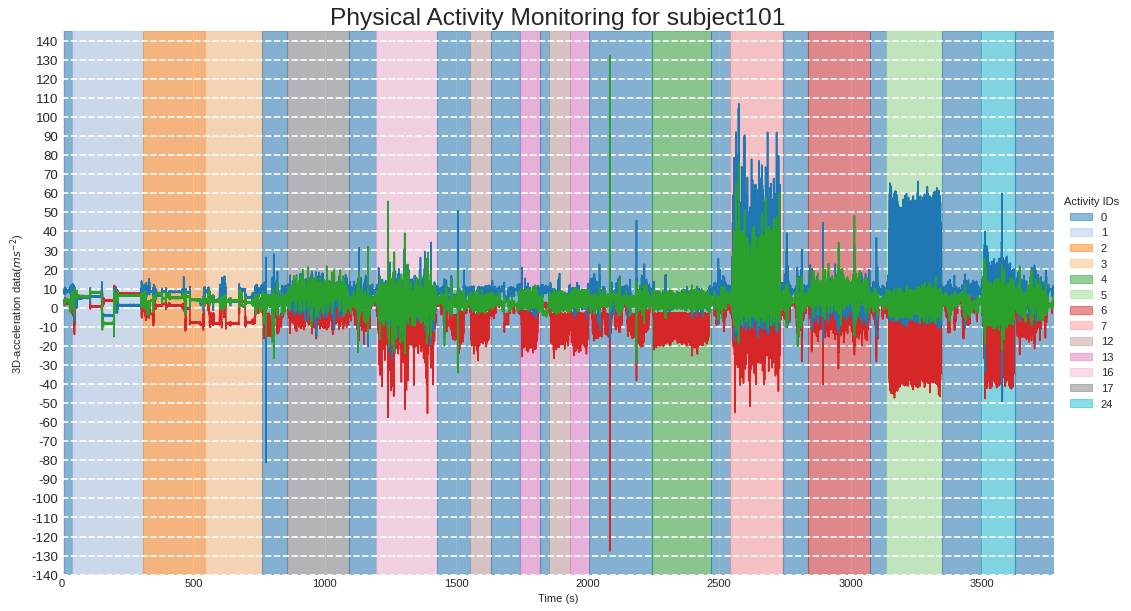

In [ ]:
# Create list with the activity IDs of dataset
activities = [0,1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24]

# Assign one color to each activity
regioncolors = {activities[i]: tableau20[i] for i in range(len(activities))}

plot_fulldata(X,y,regioncolors)


In [ ]:
x_trial = [[1,1],
     [1,1],
     [1,1],
     [1,1],
     [1,1],
     [1,1],
     [1,1],
     [2,2],
     [2,2],
     [2,2],
     [3,3],
     [3,3],
     [3,3]]
y_trial = np.array([1,1,1,1,1,1,1,2,2,2,3,3,3])
#print(np.diff(y_trial))
indices = np.where(np.diff(y_trial) == 1)[0]
#print(indices)
indices = indices+1
#print(indices)
out_x = np.split(x_trial, indices)
out_y = np.split(y_trial, indices)
#print(len(out[0]))
#print(out[2])

x_arr = []
y_arr = []
for xi in range(0, len(out_x)):
  for yi in range(0, int((len(out_x[xi])/2))):
    x_arr.append(out_x[xi][(yi*2) : ((yi+1)*2)])

#for i in range(len(x_arr))
print(x_arr[3])

[[2 2]
 [2 2]]


In [ ]:
out_x[0][0:3]

array([[1, 1],
       [1, 1],
       [1, 1]])

# Split the data
If you haven't noticed after trying to run the entire code, there are missing segments in the splitInWindows() function.

In [ ]:
# Split data into windows  
import math

def splitInWindows (data,labels, wSize, wStep):
    # Divide data according to the different activities
    # hint: np.where and np.diff
    diffActivities = np.diff(labels) # we check where the label changes and get the return list which contains 1 at all position where label changes and 0 at all other positions
    activityChangeIndices = np.where(diffActivities != 0)[0] # we get a list with indices whose values are notequals 0 in "diffActivities"
    activityChangeIndices = activityChangeIndices + 1 # Split takes indices as outer bound, so if we give directly it will condsider last element from each category as next category, to avoid this we add 1 to indices
    #print(activityChangeIndices)

    X_activities = np.split(data, activityChangeIndices )
    y_activities = labels[ np.where(np.diff(labels) != 0)[0]]
    #y_activities = np.split(labels, activityChangeIndices)
    
    print("X list shape ", len(X_activities))
    print("y list shape ", len(y_activities))

    
    for activity in range(0,len(X_activities)): 
      # this loop can be commented after finishing so you don't have a lot of unecessary outputs
      print("X shape in activity ", activity, X_activities[activity].shape)
    
    # Add the label of the last activity
    y_activities = np.append(y_activities,labels[-1])
    
    # how fast is the sample rate?
    m_samplerate = np.round(1/np.diff(data[:,0]).mean())
    print("sampling rate", m_samplerate)
    
    # Convert size of window and time step into data points
    m_windowsize = int(m_samplerate * wSize)
    m_windowstep = int(m_samplerate * wStep)
    #print(m_windowsize)
    #print(m_windowstep)
    
    # destination to store the windows
    X_window = []
    y_window = []
    #print(len(X_activities))
    #print(len(y_activities))
    
    # Divide data in windows
    for activity in range(0, len(X_activities)): #go through the activities
        for wind in range(0, len(X_activities[activity])-m_windowsize-m_windowstep, m_windowstep): #go through the time axis (start, end, step) here we are selecting the starting point of the window, 
            m_window_data = X_activities[activity][wind : wind+m_windowsize, :] # TODO: current window subindexes
            X_window.append(m_window_data) #append the window to the output
            y_window.append(y_activities[activity]) #append the label
    X_window = np.stack(X_window)
    y_window = np.stack(y_window)
    
    return X_window, y_window, m_samplerate


In [ ]:
# Split Data into sliding windows with the above function
X_w, Y_w, srate = splitInWindows(X,y,windowSize,windowStep)

# Visualize data shape (windows, samples, channels)
print("Data shape ", X_w.shape)   # expected (7413, 200, 4) with default parameters
print("Labels shape ", Y_w.shape) # expected (7413,) with default parameters


X list shape  26
y list shape  25
X shape in activity  0 (2928, 4)
X shape in activity  1 (27187, 4)
X shape in activity  2 (23480, 4)
X shape in activity  3 (21717, 4)
X shape in activity  4 (9655, 4)
X shape in activity  5 (23573, 4)
X shape in activity  6 (10220, 4)
X shape in activity  7 (22941, 4)
X shape in activity  8 (12580, 4)
X shape in activity  9 (8120, 4)
X shape in activity  10 (10995, 4)
X shape in activity  11 (7480, 4)
X shape in activity  12 (3686, 4)
X shape in activity  13 (7770, 4)
X shape in activity  14 (7419, 4)
X shape in activity  15 (24008, 4)
X shape in activity  16 (22253, 4)
X shape in activity  17 (7163, 4)
X shape in activity  18 (20265, 4)
X shape in activity  19 (9656, 4)
X shape in activity  20 (23575, 4)
X shape in activity  21 (6071, 4)
X shape in activity  22 (21265, 4)
X shape in activity  23 (14881, 4)
X shape in activity  24 (12912, 4)
X shape in activity  25 (14617, 4)
sampling rate 100.0
Data shape  (7413, 200, 4)
Labels shape  (7413,)


expected output:
```
X shape  26
y shape  25
X shape in activity  0 (2928, 4)
X shape in activity  1 (27187, 4)
X shape in activity  2 (23480, 4)
X shape in activity  3 (21717, 4)
X shape in activity  4 (9655, 4)
X shape in activity  5 (23573, 4)
X shape in activity  6 (10220, 4)
X shape in activity  7 (22941, 4)
X shape in activity  8 (12580, 4)
X shape in activity  9 (8120, 4)
X shape in activity  10 (10995, 4)
X shape in activity  11 (7480, 4)
X shape in activity  12 (3686, 4)
X shape in activity  13 (7770, 4)
X shape in activity  14 (7419, 4)
X shape in activity  15 (24008, 4)
X shape in activity  16 (22253, 4)
X shape in activity  17 (7163, 4)
X shape in activity  18 (20265, 4)
X shape in activity  19 (9656, 4)
X shape in activity  20 (23575, 4)
X shape in activity  21 (6071, 4)
X shape in activity  22 (21265, 4)
X shape in activity  23 (14881, 4)
X shape in activity  24 (12912, 4)
X shape in activity  25 (14617, 4)
sampling rate 100.0
Data shape  (7413, 200, 4)
Labels shape  (7413,)
```



**Let's see the seperated windows from different classes**

In [ ]:
def plot_windows(data,labels,srate,numcolumns,window):
    # Identify indices when there is a change of activities 
    label_ch = np.where(np.diff(labels) != 0)[0]
    # Add corresponding activity label to the index
    label_ch = np.column_stack((label_ch,labels[np.where(np.diff(labels) != 0)[0]]))
    # Find the different types of activities performed by the person
    activityLabels = np.unique(labels)
    # Remove Activity 0 (transient activities) 
    activityLabels = np.delete(activityLabels,np.where(activityLabels == 0))

    # Define the number of columns and rows to visualize data
    row = int(np.ceil(len(activityLabels)/numcolumns))

    # Set the time axis 
    time = np.linspace(0,data.shape[1]/srate,data.shape[1],endpoint=False)

    # Plot windows for each activity
    fig, axs = plt.subplots(row,numcolumns,figsize=(15,10),sharex=True)

    for act in range(len(activityLabels)):
        indx = int(act / numcolumns)
        indy = act % numcolumns
        index_act = label_ch[np.argwhere(label_ch == activityLabels[act])[0][0]][0]  
        axs[indx,indy].plot(time,data[index_act+window,:,1:])
        axs[indx,indy].set_title('Activity ID - %d'%(activityLabels[act]), fontsize=12)
    fig.suptitle('Window %d for different activities of %s'%(window,fileName.replace(".dat","").replace("Protocol/","")),fontsize=22)
    fig.text(0.5, 0.08, 'Time (s)', ha='center')
    fig.text(0.08, 0.5, '3D-acceleration data($ms^{-2}$)', va='center', rotation='vertical')
    plt.show()




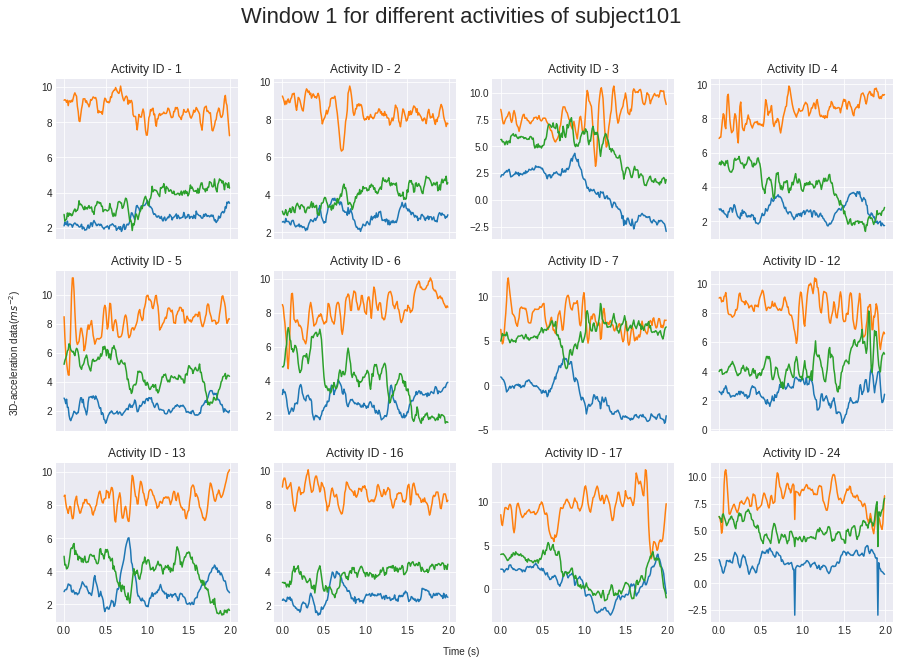

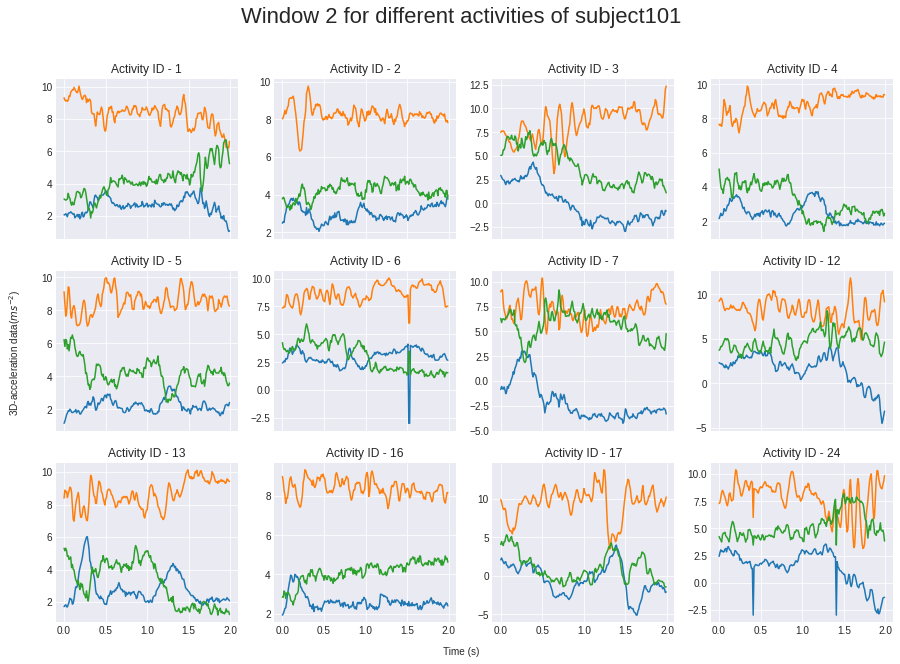

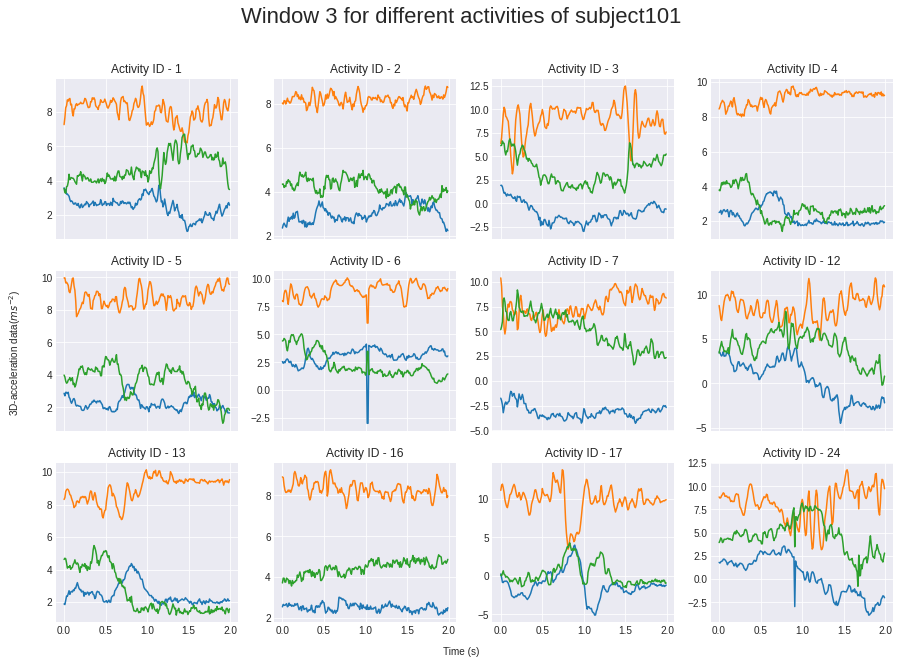

In [ ]:
# Define the number of columns to plot data
col = 4
# Which window you want to visualize
window = 1

# Plot some windows
plot_windows(X_w, Y_w, srate,col,window)
plot_windows(X_w, Y_w, srate,col,2)
plot_windows(X_w, Y_w, srate,col,3)

With our default settings, the plot should look like the following:

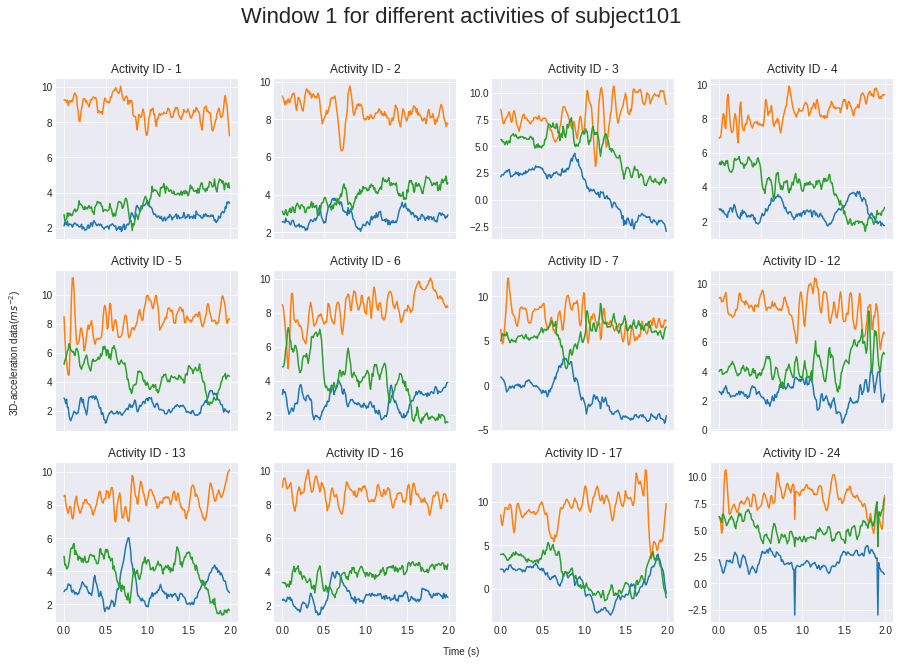

In [ ]:
# Save data 
np.savez(outputFile,X_w,Y_w)
print("File saved to", outputFile)

File saved to Protocol/subject101


In [ ]:
# Load data
data = np.load("Protocol/subject101.npz")
X = data['arr_0']
y = data['arr_1']

print("Data shape ", X.shape)
print("Labels shape ", y.shape)

Data shape  (7413, 200, 4)
Labels shape  (7413,)


In [ ]:
# Split data for all the .dat files in a folder
def splitFolderData(Folder):
    search = Folder + "/" + "*.dat"
    for file in glob.glob(search):
        print("Opening file: ", file)
        outputFile = file.replace(".dat","")
        dataset = pd.read_csv(file, header=None, sep=' ') 

        X = dataset.iloc[:, cols].values
        y = dataset.iloc[:, 1].values # Activity labels

        print("\nX shape: ",X.shape)
        print("y shape: ",y.shape)

        print("\nDealing with Nan Values ...\n")
        # Check if there are Nan values in the dataset
        nanCount = np.isnan(X).sum()
        print("Found ", nanCount," Nan values")

        # Taking care of missing data (Nan)
        print("Replacing Nan values ...")
        replaceNan(X)

        # Check again if there are Nan values in the dataset
        nanCount = np.isnan(X).sum()
        print("Found ", nanCount," Nan values after preprocessing.\n")

        # Split Data into sliding windows
        print("Splitting data into windows of %5.2f seconds with an overlap of %5.2f seconds"%(windowSize,windowStep))
        X_w, Y_w,_ = splitInWindows(X,y,windowSize,windowStep)

        # Visualize data shape (windows, samples, channels)
        print("Data shape ", X_w.shape)
        print("Labels shape ", Y_w.shape)

        # Save data 
        np.savez(outputFile,X_w,Y_w)
        print("\nFile saved to", outputFile,"\n")

In [ ]:
# Test with all the folders, this will process all the subjects' files in the dataset.
splitFolderData("Protocol")

Opening file:  Protocol/subject104.dat

X shape:  (329576, 4)
y shape:  (329576,)

Dealing with Nan Values ...

Found  6642  Nan values
Replacing Nan values ...
Found  0  Nan values after preprocessing.

Splitting data into windows of  2.00 seconds with an overlap of  0.50 seconds
X list shape  23
y list shape  22
X shape in activity  0 (6954, 4)
X shape in activity  1 (23047, 4)
X shape in activity  2 (5266, 4)
X shape in activity  3 (25492, 4)
X shape in activity  4 (24706, 4)
X shape in activity  5 (24995, 4)
X shape in activity  6 (6480, 4)
X shape in activity  7 (20037, 4)
X shape in activity  8 (11248, 4)
X shape in activity  9 (8535, 4)
X shape in activity  10 (11511, 4)
X shape in activity  11 (7328, 4)
X shape in activity  12 (2778, 4)
X shape in activity  13 (8159, 4)
X shape in activity  14 (6957, 4)
X shape in activity  15 (24625, 4)
X shape in activity  16 (31932, 4)
X shape in activity  17 (12749, 4)
X shape in activity  18 (27533, 4)
X shape in activity  19 (8565, 4)
X s